In [293]:
import pandas as pd 

bio_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_11_bio.csv", index_col=0)
clip_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_clip_FG_CLIP_15.csv", index_col=0)
visual_res = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_visual_branch_only.csv", index_col=0)
clip_vis = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\res_11_18_clip_vis.csv", index_col=0)
bio_res.rename(columns={'acc': 'BiomedCLIP'}, inplace=True)
clip_res.rename(columns={'acc': 'CLIP'}, inplace=True)
visual_res.rename(columns={'acc': 'BiomedCLIP(w/o text branch)'}, inplace=True)
clip_vis.rename(columns={'acc': 'CLIP(w/o text branch)'}, inplace=True)
# print(bio_res.head())
# print(clip_res.head())
# print(visual_res.head())
# print(clip_vis.head())
merged_df = pd.merge(bio_res, clip_res, on='global_step')
merged_df = pd.merge(merged_df, visual_res, on="global_step")
merged_df = pd.merge(merged_df, clip_vis, on="global_step")
merged_df.set_index('global_step', inplace=True)
print(merged_df)

             BiomedCLIP      CLIP  BiomedCLIP(w/o text branch)  \
global_step                                                      
1000           0.623830  0.656105                     0.641899   
2000           0.645696  0.654664                     0.658200   
3000           0.656694  0.658069                     0.671948   
4000           0.644517  0.641178                     0.662782   
5000           0.652570  0.660884                     0.657741   
6000           0.652700  0.654141                     0.675548   
7000           0.651718  0.665532                     0.671817   
8000           0.669722  0.661277                     0.664157   
9000           0.670049  0.655385                     0.663764   
10000          0.670245  0.659902                     0.665728   

             CLIP(w/o text branch)  
global_step                         
1000                      0.600262  
2000                      0.635745  
3000                      0.641178  
4000                  

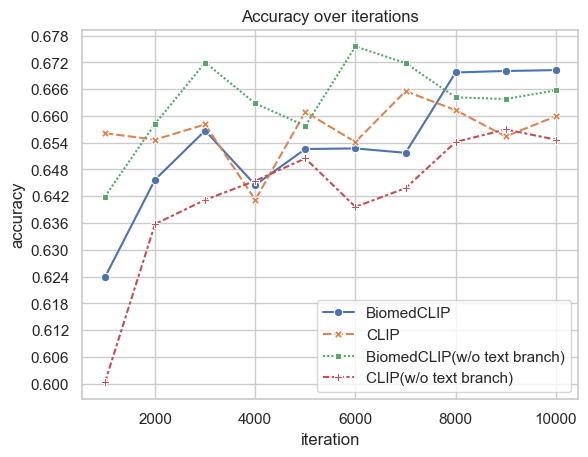

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# merged_df.plot(kind='line', marker='o')

# bio_max = merged_df.bio_accuracy.max()
# clip_max = merged_df.clip_accuracy.max()
# bio_std = merged_df.bio_accuracy.std()
# clip_std = merged_df.clip_accuracy.std()
# vis_std = merged_df.visonly_accuracy.std()
# clip_vis_std = merged_df.clip_visonly_accuracy.std()
# 设置图表标题和标签
plt.title('Accuracy over iterations')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
# # for i, txt in enumerate(merged_df['bio_accuracy']):
# #     plt.text(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
# # for i, txt in enumerate(merged_df['clip_accuracy']):
# #     plt.text(merged_df.index[i], txt, f'{txt:.4f}', ha='left', va='bottom', fontsize=9)
# plt.text(5000, 0.636, f'bio_std: {bio_std:.4f}', fontsize=13, ha='center', va='top', color='blue')
# plt.text(5000, 0.624, f'clip_std: {clip_std:.4f}', fontsize=13, ha='center', va='bottom', color='orange')
# plt.text(9060, 0.632, f'bio_vis_only_std: {vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='green')
# plt.text(9060, 0.624, f'clip_vis_only_std: {clip_vis_std:.4f}', fontsize=13, ha='center', va='bottom', color='red')
# 显示图表

sns.lineplot(data=merged_df[:], markers=True, linestyle="-")
# plt.legend(bbox_to_anchor=(0.55, 0.18), loc='upper left')
plt.grid(True)
plt.show()


In [146]:
from scipy import stats
import numpy as np
accuracy_values = merged_df["visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("visonly_accuracy 均值:", mean_accuracy)
print("visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("visonly_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["bio_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("bio_accuracy 均值:", mean_accuracy)
print("bio_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("bio_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["clip_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("clip_accuracy 均值:", mean_accuracy)
print("clip_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("clip_accuracy 95% 置信区间:", confidence_interval)


accuracy_values = merged_df["clip_visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("clip_visonly_accuracy 均值:", mean_accuracy)
print("clip_visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("clip_visonly_accuracy 95% 置信区间:", confidence_interval)

plt.figure(figure=(10, 6 ))
sns.lineplot

visonly_accuracy 均值: 0.6633584288052374
visonly_accuracy 方差: 9.103900753864178e-05
visonly_accuracy 95% 置信区间: (0.6565328964226492, 0.6701839611878256)
bio_accuracy 均值: 0.6537741407528641
bio_accuracy 方差: 0.00020594223202016515
bio_accuracy 95% 置信区间: (0.6435082773371567, 0.6640400041685716)
clip_accuracy 均值: 0.6567135842880523
clip_accuracy 方差: 4.247478413721418e-05
clip_accuracy 95% 置信区间: (0.6520514115091033, 0.6613757570670012)
clip_visonly_accuracy 均值: 0.6422258592471358
clip_visonly_accuracy 方差: 0.00026726597217943796
clip_visonly_accuracy 95% 置信区间: (0.6305310105230305, 0.6539207079712411)


<function seaborn.relational.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)>

<Figure size 640x480 with 0 Axes>

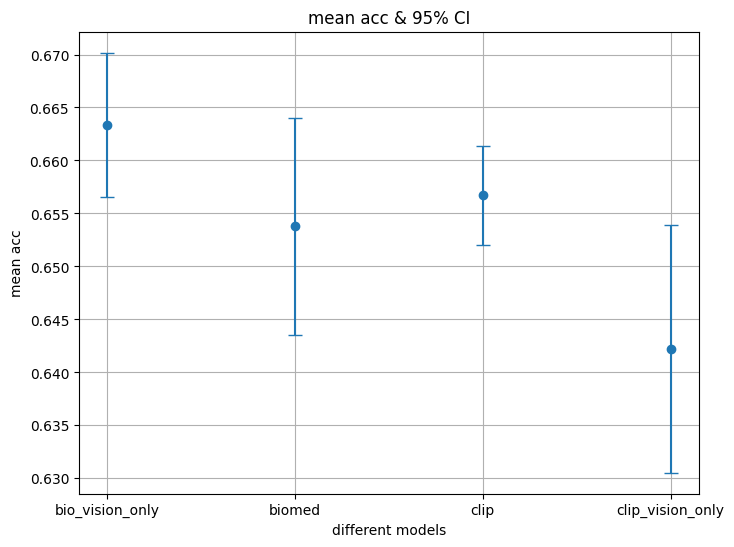

In [41]:
import matplotlib.pyplot as plt

# 示例数据
mean_values = [0.6633584288052374, 0.6537741407528641, 0.6567135842880523, 0.6422258592471358]
confidence_intervals = [(0.6565328964226492, 0.6701839611878256), (0.6435082773371567, 0.6640400041685716), (0.6520514115091033, 0.6613757570670012) , (0.6305310105230305, 0.6539207079712411)]

# 提取置信区间的半宽度
half_widths = [(upper - lower) / 2 for lower, upper in confidence_intervals]

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.errorbar(x=range(1, len(mean_values) + 1), y=mean_values, yerr=half_widths, fmt='o', capsize=5)

# 添加标题和标签
plt.title('mean acc & 95% CI')
plt.xticks([1, 2, 3, 4], ['bio_vision_only', 'biomed', 'clip',  "clip_vision_only"])
plt.xlabel('different models')
plt.ylabel('mean acc')
plt.grid()

# 显示图表
plt.show()


## phased conclusion

针对训练阶段，发现了一个有意思的现象， 使用两个pre-train models : CLIP, BiomedCLIP

1. 在有限的训练次数下，biomed通过orthogonal module后，<font color=red>**起始性能不如不使用orthogonal module的version（biomed vision encoder only）**</font>， <font color=red>**但是随着训练次数的增加，biomedCLIP version 的性能逐渐提升（在vision only version 性能达到瓶颈或过拟合的时候）**</font>。同时加入orthogonal后一定程度的缓解了过拟合。 在上图中， Biomed version 的95%置信区间更大可以理解为，在整个训练过程中，该模型的性能提升更明显

2. 相反，在CLIP中，使用完整的CLIP（vision+text）encoder在起始阶段会有更好的performance，同时它的performance还更加稳定。
3. 这种现象是否能被理解为，**biomedCLIP相比于CLIP学到了更具有针对性的医学影像信息**。导致将向量正交化的操作改变原有学到的医学影像上的特定知识。而在多次迭代后，biomed FGCLIP在biomed的原有基础上学到了更适合于当前任务的embedding表征，因此在后续的训练中，acc逐渐升高
4. 相反的，**CLIP中保存的是更为general的knowledge**，因此起始阶段，直接将其正交化操作不会对医学领域的特定知识产生过大的负面影响。Oppositely，通过将相对较为general的医学知识进行正交，更有利于该pre-trained在当前任务上的performance





In [42]:
from uu import decode

df_clip_100 = pd.read_csv(r"D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\clip_version_100step.csv")
df_clip_100.head()

,ITERATION,ACC
0,700,0.6486
1,800,0.6638
2,900,0.6636
3,1000,0.6471
4,1100,0.5554


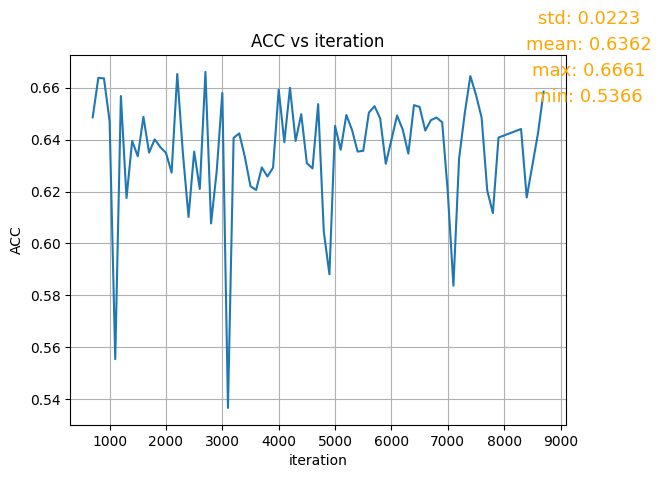

In [119]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
# 使用 seaborn 的线图
sns.lineplot(x='ITERATION', y='ACC', data=df_clip_100)
# plt.plot(df_clip_100['ITERATION'], df_clip_100['ACC'], marker='o')
std = df_clip_100.ACC.std()
mean = df_clip_100.ACC.mean()
max = df_clip_100.ACC.max()
min = df_clip_100.ACC.min()
# 设置图表标题和轴标签
plt.title('ACC vs iteration')
plt.xlabel('iteration')
plt.ylabel('ACC')

plt.text(9500, 0.69, f'std: {std:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.68, f'mean: {mean:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.67, f'max: {max:.4f}', fontsize=13, ha='center', va='top', color='orange')
plt.text(9500, 0.66, f'min: {min:.4f}', fontsize=13, ha='center', va='top', color='orange')
# 显示图表
plt.grid()
plt.show()


## AUC analysis

{'Atelectasis': 0.7065290045289551, 'Cardiomegaly': 0.7113671934267906, 'Consolidation': 0.6597450184237843, 'Edema': 0.7059311984261565, 'Enlarged Cardiomediastinum': 0.6919008102982058, 'Fracture': 0.6265129188080596, 'Lung Lesion': 0.6924478964812916, 'Lung Opacity': 0.6590004939022284, 'No Finding': 0.4805799714521824, 'Pleural Effusion': 0.7394041080626693, 'Pleural Other': 0.7416057057956212, 'Pneumonia': 0.6825876376947176, 'Pneumothorax': 0.6872174204869519, 'average': 0.6757561059836626}


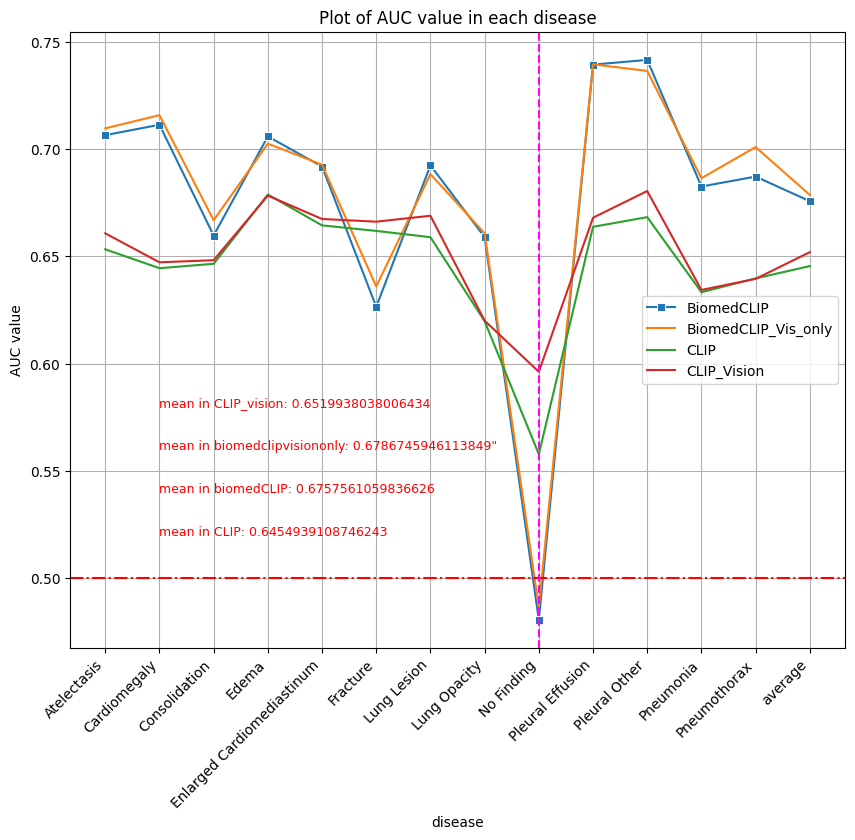

std of clip-V : 0.02353366119809311
std of clip : 0.029578308053849787
std of bioclip-V : 0.06204329194159588
std of bioclip : 0.06402278100545217


In [153]:
import pickle
import seaborn as sns
import os
pwd = os.getcwd()
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
print(biomedCLIP)
plt.figure(figsize=(10,8))

# 绘制图表
sns.lineplot(x = biomedCLIP.keys(), y = biomedCLIP.values(), label = "BiomedCLIP", marker='s')
sns.lineplot(x = biomedclipvisiononly.keys(), y = biomedclipvisiononly.values(), label = "BiomedCLIP_Vis_only")
sns.lineplot(x = clip.keys(), y = clip.values(), label = "CLIP")
sns.lineplot(x = clipv.keys(), y = clipv.values(), label = "CLIP_Vision")
plt.xlabel('disease')
plt.ylabel('AUC value')
plt.title('Plot of AUC value in each disease')


plt.grid()# 在图上画一条横线
plt.axhline(y=0.5, color='red', linestyle='dashdot', label='Horizontal Line')

# 在图上画一条纵线
plt.axvline(x=8, color='magenta', linestyle='--', label='Vertical Line')
ax = plt.gca()
# 设置特定刻度的位置
# 设置特定刻度的位置
# ax.tick_params(axis='x', which='major', colors='red', labelcolor='red', labelrotation=45, labelsize=7)
custom_tick_position = 2

# 添加文本标签在指定刻度位置
ax.annotate('Custom Tick', xy=(custom_tick_position, 0), xytext=(custom_tick_position, -0.5),
            color='red', fontsize=8, ha='center',
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xticks(rotation=45, ha='right') 
text_position1 = (1, 0.52)
text_position2 = (1, 0.54)
text_position3 = (1, 0.56)
text_position4 = (1, 0.58)
ax.text(text_position1[0], text_position1[1], f'mean in CLIP: {clip["average"]}', color='red', fontsize=9)
ax.text(text_position2[0], text_position2[1], f'mean in biomedCLIP: {biomedCLIP["average"]}', color='red', fontsize=9)
ax.text(text_position3[0], text_position3[1], f'mean in biomedclipvisiononly: {biomedclipvisiononly["average"]}"', color='red', fontsize=9)
ax.text(text_position4[0], text_position4[1], f'mean in CLIP_vision: {clipv["average"]}', color='red', fontsize=9)

plt.show()

print(f"std of clip-V : {np.std(list(clipv.values())[:-1])}")
print(f"std of clip : {np.std(list(clip.values())[:-1])}")
print(f"std of bioclip-V : {np.std(list(biomedclipvisiononly.values())[:-1])}")
print(f"std of bioclip : {np.std(list(biomedCLIP.values())[:-1])}")


{'Atelectasis': 0.7065290045289551, 'Cardiomegaly': 0.7113671934267906, 'Consolidation': 0.6597450184237843, 'Edema': 0.7059311984261565, 'Enlarged Cardiomediastinum': 0.6919008102982058, 'Fracture': 0.6265129188080596, 'Lung Lesion': 0.6924478964812916, 'Lung Opacity': 0.6590004939022284, 'No Finding': 0.5196615044485228, 'Pleural Effusion': 0.7394041080626693, 'Pleural Other': 0.7416057057956212, 'Pneumonia': 0.6825876376947176, 'Pneumothorax': 0.6872174204869519, 'average': 0.678762377752612}


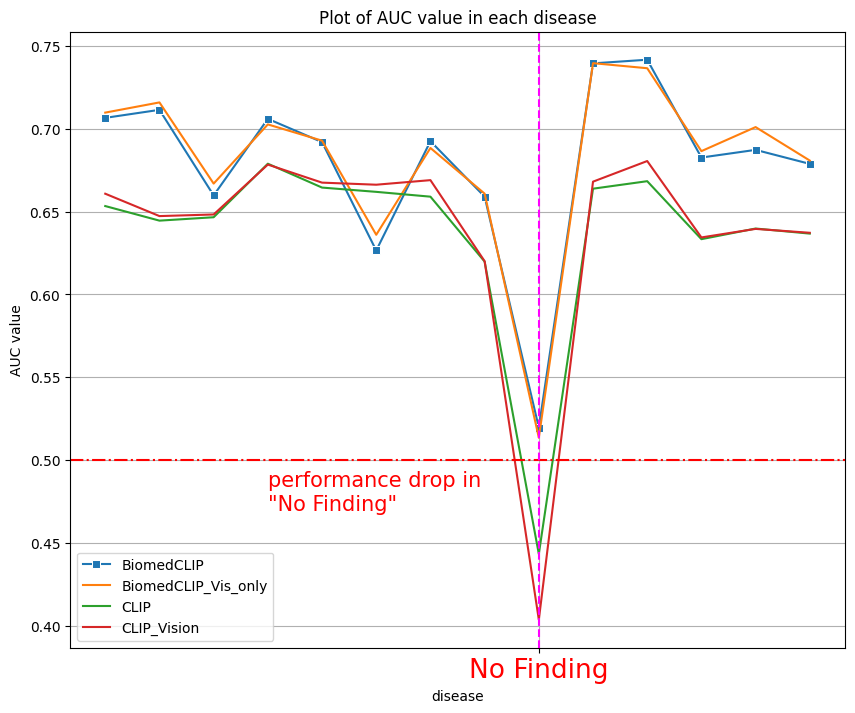

In [108]:
import pickle
from numpy import size
import seaborn as sns
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
print(biomedCLIP)
plt.figure(figsize=(10,8))

# 绘制图表
sns.lineplot(x = biomedCLIP.keys(), y = biomedCLIP.values(), label = "BiomedCLIP", marker='s')
sns.lineplot(x = biomedclipvisiononly.keys(), y = biomedclipvisiononly.values(), label = "BiomedCLIP_Vis_only")
sns.lineplot(x = clip.keys(), y = clip.values(), label = "CLIP")
sns.lineplot(x = clipv.keys(), y = clipv.values(), label = "CLIP_Vision")
plt.xlabel('disease')
plt.ylabel('AUC value')
plt.title('Plot of AUC value in each disease')



plt.axhline(y=0.5, color='red', linestyle='dashdot', label='Horizontal Line')

# 在图上画一条纵线
plt.axvline(x=8, color='magenta', linestyle='--', label='Vertical Line')
ax = plt.gca()
# 设置特定刻度的位置
# 设置特定刻度的位置
# ax.tick_params(axis='x', which='major', colors='red', labelcolor='red', labelrotation=45, labelsize=7)
custom_tick_position = 2

# 添加文本标签在指定刻度位置
# ax.annotate('Custom Tick', xy=(custom_tick_position, 0), xytext=(custom_tick_position, -0.5),
#             color='red', fontsize=11, ha='center',
#             arrowprops=dict(facecolor='red', shrink=0.05))
# plt.xticks(rotation=45, ha='right') 
custom_tick_position = 8
ax.set_xticks([custom_tick_position])
ax.set_xticklabels(['No Finding'], color='red',size = 19)
text_position = (3, 0.47)
ax.text(text_position[0], text_position[1], 'performance drop in \n"No Finding"', color='red', fontsize=15)

plt.grid()# 在图上画一条横线
plt.show()



{'Atelectasis': 0.7065290045289551, 'Cardiomegaly': 0.7113671934267906, 'Consolidation': 0.6597450184237843, 'Edema': 0.7059311984261565, 'Enlarged Cardiomediastinum': 0.6919008102982058, 'Fracture': 0.6265129188080596, 'Lung Lesion': 0.6924478964812916, 'Lung Opacity': 0.6590004939022284, 'No Finding': 0.5196615044485228, 'Pleural Effusion': 0.7394041080626693, 'Pleural Other': 0.7416057057956212, 'Pneumonia': 0.6825876376947176, 'Pneumothorax': 0.6872174204869519, 'average': 0.678762377752612}


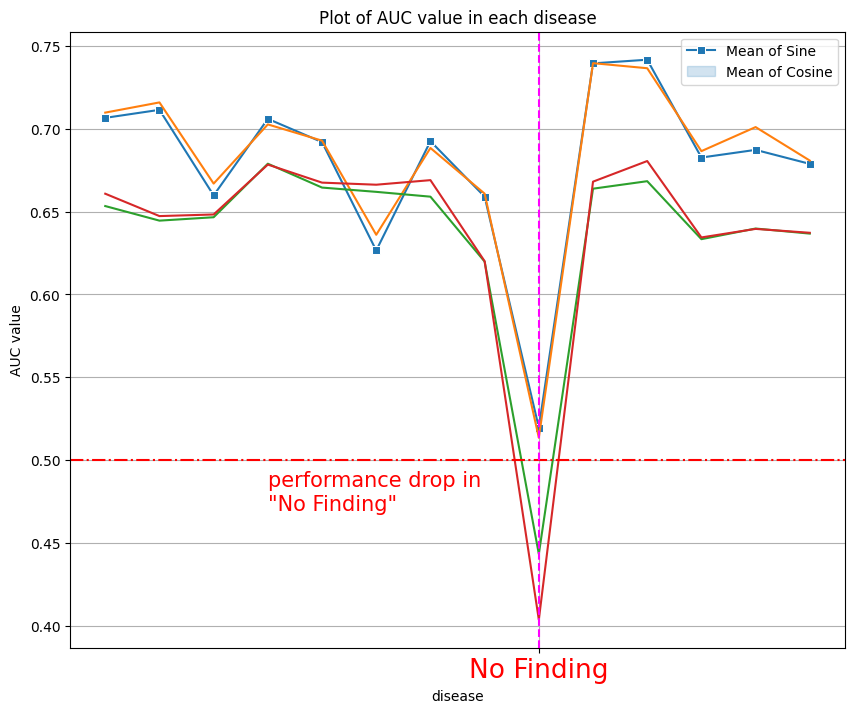

{'Atelectasis': 0.7065290045289551, 'Cardiomegaly': 0.7113671934267906, 'Consolidation': 0.6597450184237843, 'Edema': 0.7059311984261565, 'Enlarged Cardiomediastinum': 0.6919008102982058, 'Fracture': 0.6265129188080596, 'Lung Lesion': 0.6924478964812916, 'Lung Opacity': 0.6590004939022284, 'Pleural Effusion': 0.7394041080626693, 'Pleural Other': 0.7416057057956212, 'Pneumonia': 0.6825876376947176, 'Pneumothorax': 0.6872174204869519, 'average': 0.692020783861286}


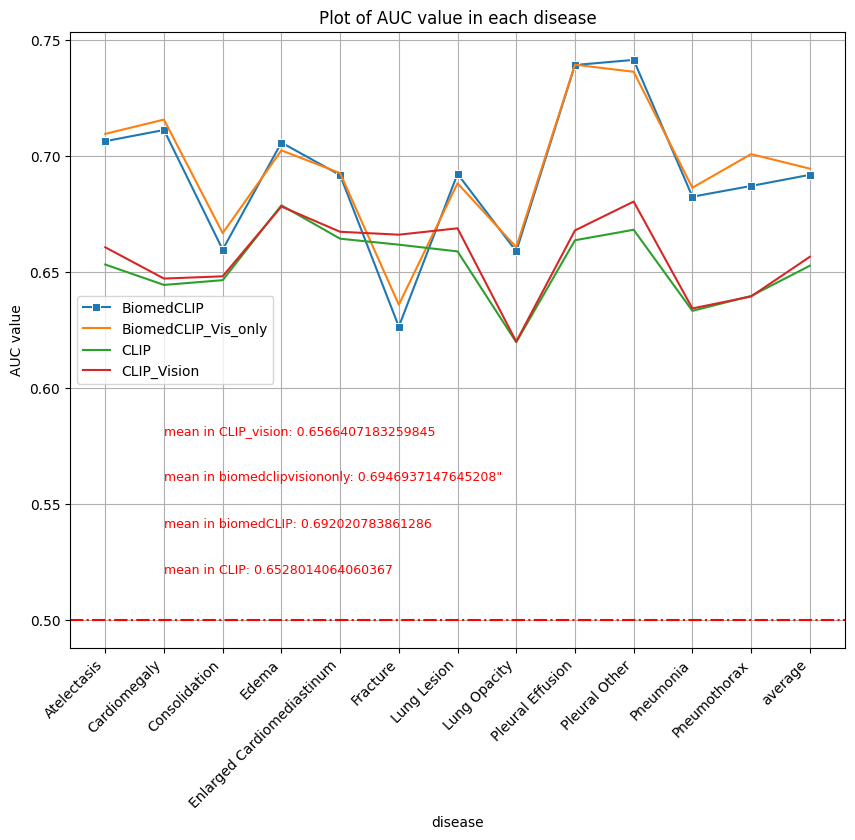

std of clip-V : 0.017868026946469866
std of clip : 0.015924486931500476
std of bioclip-V : 0.028882385259555426
std of bioclip : 0.03164610809606299


In [130]:
import pickle
import seaborn as sns
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip_without_no_finding', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only_without_no_finding', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip_without_no_finding', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only_without_no_finding', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
print(biomedCLIP)
plt.figure(figsize=(10,8))

# 绘制图表
sns.lineplot(x = biomedCLIP.keys(), y = biomedCLIP.values(), label = "BiomedCLIP", marker='s')
sns.lineplot(x = biomedclipvisiononly.keys(), y = biomedclipvisiononly.values(), label = "BiomedCLIP_Vis_only")
sns.lineplot(x = clip.keys(), y = clip.values(), label = "CLIP")
sns.lineplot(x = clipv.keys(), y = clipv.values(), label = "CLIP_Vision")
plt.xlabel('disease')
plt.ylabel('AUC value')
plt.title('Plot of AUC value in each disease')


plt.grid()# 在图上画一条横线
plt.axhline(y=0.5, color='red', linestyle='dashdot', label='Horizontal Line')

# 在图上画一条纵线
# plt.axvline(x=8, color='magenta', linestyle='--', label='Vertical Line')
ax = plt.gca()
# 设置特定刻度的位置
# 设置特定刻度的位置
# ax.tick_params(axis='x', which='major', colors='red', labelcolor='red', labelrotation=45, labelsize=7)
custom_tick_position = 2

# 添加文本标签在指定刻度位置
ax.annotate('Custom Tick', xy=(custom_tick_position, 0), xytext=(custom_tick_position, -0.5),
            color='red', fontsize=8, ha='center',
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xticks(rotation=45, ha='right') 
text_position1 = (1, 0.52)
text_position2 = (1, 0.54)
text_position3 = (1, 0.56)
text_position4 = (1, 0.58)
ax.text(text_position1[0], text_position1[1], f'mean in CLIP: {clip["average"]}', color='red', fontsize=9)
ax.text(text_position2[0], text_position2[1], f'mean in biomedCLIP: {biomedCLIP["average"]}', color='red', fontsize=9)
ax.text(text_position3[0], text_position3[1], f'mean in biomedclipvisiononly: {biomedclipvisiononly["average"]}"', color='red', fontsize=9)
ax.text(text_position4[0], text_position4[1], f'mean in CLIP_vision: {clipv["average"]}', color='red', fontsize=9)

plt.show()

print(f"std of clip-V : {np.std(list(clipv.values())[:-1])}")
print(f"std of clip : {np.std(list(clip.values())[:-1])}")
print(f"std of bioclip-V : {np.std(list(biomedclipvisiononly.values())[:-1])}")
print(f"std of bioclip : {np.std(list(biomedCLIP.values())[:-1])}")


In [225]:
import pickle
import seaborn as sns
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip_without_no_finding', 'rb') as f:
    biomedCLIP = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\biomedclip - vision-only_without_no_finding', 'rb') as f:
    biomedclipvisiononly = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip_without_no_finding', 'rb') as f:
    clip = pickle.load(f)
with open(r'D:\exchange\ShanghaiTech\learning\code\diagnosisP\x_ray_constrastive\output\temp_var\clip - vision-only_without_no_finding', 'rb') as f:
    clipv = pickle.load(f)

# 打印加载的字典
(biomedCLIP)
diseases = {}
for key, value in biomedCLIP.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
biomedCLIP = diseases

diseases = {}
for key, value in biomedclipvisiononly.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
biomedclipvisiononly=diseases
diseases = {}
for key, value in clip.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
clip=diseases

diseases = {}
for key, value in clipv.items():
    disease_type = key.split('_')[0]
    if disease_type not in diseases:
        diseases[disease_type] = []
    diseases[disease_type].append(value)
clipv=diseases


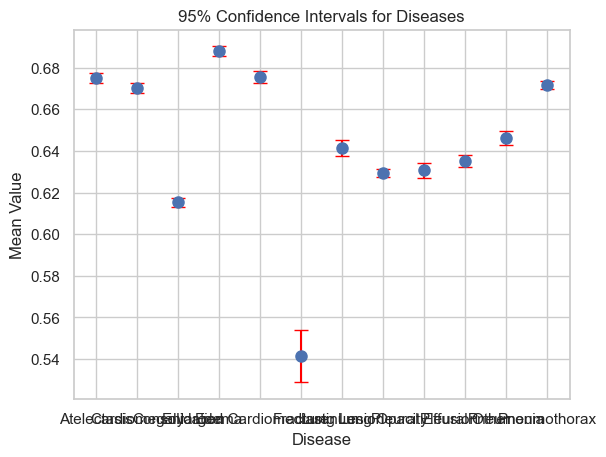

76
76
76
76
76
76
76
76
76
74
76
75


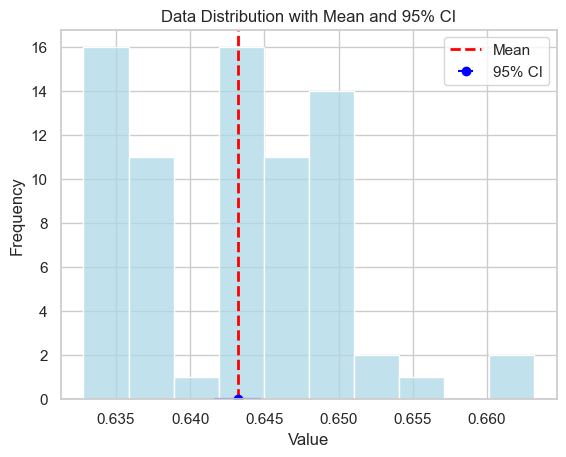

In [275]:
diseases =  clip
diseases.keys()
means = [np.mean(values) for values in diseases.values()]
std_devs = [np.std(values) for values in diseases.values()]
conf_intervals = [1.96 * std_dev / np.sqrt(len(values)) for std_dev, values in zip(std_devs, diseases.values())]

# 绘制置信区间
plt.errorbar(x=list(diseases.keys()), y=means, yerr=conf_intervals, fmt='o', capsize=5, markersize=8, color='b', ecolor='red')

# 设置图表标题和标签
plt.title('95% Confidence Intervals for Diseases')
plt.xlabel('Disease')
plt.ylabel('Mean Value')

# 显示图表
plt.show()
means= []
for i in range(74):
  means.append([])
num = len(diseases["Atelectasis"])
for index in range(74):
  for i , j in diseases.items():
    means[index].append(j[index])

for i ,j in diseases.items():
  print(len(j))


means 

final = []
for i in means:
  final.append(np.mean(i))
final
data = final
mean_value = np.mean(data)
conf_interval = 1.96 * np.std(data) / np.sqrt(len(data))

# 设置 Seaborn 风格
sns.set(style="whitegrid")

# 画数据分布图
sns.histplot(data, bins=10, kde=False, color='lightblue')

# 绘制均值的垂直线
plt.axvline(x=mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')

# 绘制95%置信区间的误差条
plt.errorbar(x=mean_value, y=0, xerr=conf_interval, fmt='o', color='blue', label='95% CI')

# 设置图表标题和标签
plt.title('Data Distribution with Mean and 95% CI')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 添加图例
plt.legend()

# 显示图表
plt.show()

In [276]:
from scipy import stats
import numpy as np
accuracy_values =final# merged_df["visonly_accuracy"]
mean_accuracy = np.mean(accuracy_values)
var_accuracy = np.std(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

print("visonly_accuracy 均值:", mean_accuracy)
print("visonly_accuracy 方差:", var_accuracy)
confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

print("visonly_accuracy 95% 置信区间:", confidence_interval)


# accuracy_values = merged_df["bio_accuracy"]
# mean_accuracy = np.mean(accuracy_values)
# var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

# print("bio_accuracy 均值:", mean_accuracy)
# print("bio_accuracy 方差:", var_accuracy)
# confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

# print("bio_accuracy 95% 置信区间:", confidence_interval)


# accuracy_values = merged_df["clip_accuracy"]
# mean_accuracy = np.mean(accuracy_values)
# var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

# print("clip_accuracy 均值:", mean_accuracy)
# print("clip_accuracy 方差:", var_accuracy)
# confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

# print("clip_accuracy 95% 置信区间:", confidence_interval)


# accuracy_values = merged_df["clip_visonly_accuracy"]
# mean_accuracy = np.mean(accuracy_values)
# var_accuracy = np.var(accuracy_values, ddof=1)  # 使用 ddof=1 表示使用样本方差，而不是总体方差

# print("clip_visonly_accuracy 均值:", mean_accuracy)
# print("clip_visonly_accuracy 方差:", var_accuracy)
# confidence_interval = stats.t.interval(0.95, len(accuracy_values) - 1, loc=mean_accuracy, scale=stats.sem(accuracy_values))

# print("clip_visonly_accuracy 95% 置信区间:", confidence_interval)

plt.figure(figure=(10, 6 ))
sns.lineplot
plt.show()



visonly_accuracy 均值: 0.6431912244973848
visonly_accuracy 方差: 0.006917213683122909
visonly_accuracy 95% 置信区间: (0.6415886360623749, 0.6447938129323946)


<Figure size 640x480 with 0 Axes>

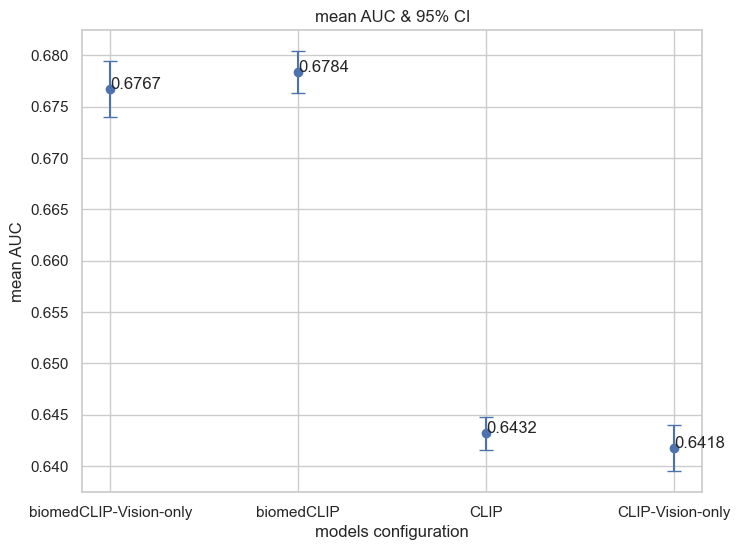

In [277]:
import matplotlib.pyplot as plt

# 示例数据
mean_values = [0.6767312040206375, 0.6783608480280382, 0.6431912244973848, 0.6417641245071138]
confidence_intervals = [(0.6740241582646873, 0.6794382497765876), (0.6763277499926857, 0.6803939460633907),  (0.6415886360623749, 0.6447938129323946) ,  (0.6395053972487391, 0.6440228517654886)]

# 提取置信区间的半宽度
half_widths = [(upper - lower) / 2 for lower, upper in confidence_intervals]

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.errorbar(x=range(1, len(mean_values) + 1), y=mean_values, yerr=half_widths, fmt='o', capsize=5)
plt.annotate(f'{mean_values[0]:.4f}', xy=(1.5, 0.6767312040206375),
             xytext=(1, 0.6767312040206375),
            )
plt.annotate(f'{mean_values[1]:.4f}', xy=(2.5, mean_values[1]),
             xytext=(2, mean_values[1]),
            )
plt.annotate(f'{mean_values[2]:.4f}', xy=(3.5, mean_values[2]),
             xytext=(3, mean_values[2]),
            )
plt.annotate(f'{mean_values[3]:.4f}', xy=(4, mean_values[3]),
             xytext=(4, mean_values[3]),
            )
# 添加标题和标签
plt.title('mean AUC & 95% CI')
plt.grid()
plt.xticks([1, 2, 3, 4], ['biomedCLIP-Vision-only', 'biomedCLIP', 'CLIP',  "CLIP-Vision-only"])
plt.xlabel('models configuration')
plt.ylabel('mean AUC')
plt.grid(True)


# 显示图表
plt.show()

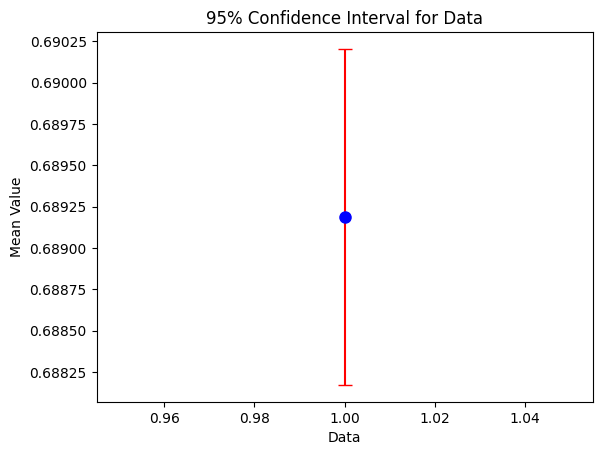

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# 生成示例数据
data = Pneumothorax

# 计算均值和标准差
mean_value = np.mean(data)
std_dev = np.std(data)

conf_interval = 1.96 * std_dev / np.sqrt(len(data))

# 绘制置信区间
plt.errorbar(x=1, y=mean_value, yerr=conf_interval, fmt='o', capsize=5, markersize=8, color='b', ecolor='red')

# 设置图表标题和标签
plt.title('95% Confidence Interval for Data')
plt.xlabel('Data')
plt.ylabel('Mean Value')

# 显示图表
plt.show()

---
## AUC analysis


In [5]:
auc = {
  "Atelectasis": {'positive': 0.7235893454182446, 'negative': 0.6981132075471698, 'uncertain': 0.6981065483485626},
  'Cardiomegaly': {'positive': 0.7552043119866463, 'negative': 0.7370909217779638, 'uncertain': 0.6456380313560692},
  'Consolidation': {'positive': 0.5622902319568406, 'negative': 0.676526408369208, 'uncertain': 0.5723430197114407},
  'Edema': {'positive': 0.7890503875968992, 'negative': 0.690048060230616, 'uncertain': 0.6738288000117653},
  'Enlarged Cardiomediastinum': {'positive': 0.5680418535127055, 'negative': 0.7905536586998727, 'uncertain': 0.6378478228372519},
  'Fracture': {'positive': 0.4775439891718961, 'negative': 0.5869565217391305, 'uncertain': 0.42951898188093185},
  'Lung Lesion': {'positive': 0.6390171416441118, 'negative': 0.605904404873477, 'uncertain': 0.6639136725343622},
  'Lung Opacity': {'positive': 0.6323855890944499, 'negative': 0.498028857525822, 'uncertain': 0.6084514973772961},
  'No Finding': {'positive': 0.7069257991869206, 'negative': 0.6894202527634576, 'uncertain': 0.5629370629370629},
  'Pleural Effusion': {'positive': 0.8311587147030184, 'negative': 0.6663188970292744, 'uncertain': 0.7329207877153083},
  'Pleural Other': {'positive': 0.7205523513753328, 'negative': 0, 'uncertain': 0.7168552203490092},
  'Pneumonia': {'positive': 0.6355726818864815, 'negative': 0.6521023255813954, 'uncertain': 0.5719577075897366},
  'Pneumothorax': {'positive': 0.8018334679143115, 'negative': 0.6412910576335241, 'uncertain': 0.6535641716773792},
  'Support Devices': {'positive': 0.831523390036452, 'negative': 0.6962899050905953, 'uncertain': 0.8012061580733796}
  }

den_c_auc={
  'Atelectasis': {'positive': 0.7434161530051181, 'negative': 0.6496093005526968, 'uncertain': 0.6997393692114368},
'Cardiomegaly': {'positive': 0.7370121991573096, 'negative': 0.7531400460540087, 'uncertain': 0.6262189537201659},
'Consolidation': {'positive': 0.6190860950202619, 'negative': 0.6853677729944915, 'uncertain': 0.5881680552733185},
'Edema': {'positive': 0.7793313953488371, 'negative': 0.7178517259653163, 'uncertain': 0.6719573801592729},
'Enlarged Cardiomediastinum': {'positive': 0.5349626307922273, 'negative': 0.7573475262770302, 'uncertain': 0.6247357293868923},
'Fracture': {'positive': 0.5083671711578688, 'negative': 0.3729752770673487, 'uncertain': 0.4212683347713546},
'Lung Lesion': {'positive': 0.627527463779653, 'negative': 0.5404561074664167, 'uncertain': 0.5918535487501005},
'Lung Opacity': {'positive': 0.6534761441090554, 'negative': 0.48151068359221005, 'uncertain': 0.6311320336870345},
'No Finding': {'positive': 0.6896039893539234, 'negative': 0.6905719473998513, 'uncertain': 0.5553801037672006},
"Pleural Effusion": {'positive': 0.8199318403115871, 'negative': 0.6887770873906458, 'uncertain': 0.7208558852394468},
'Pleural Other': {'positive': 0.6972604259094942, 'negative': 0, 'uncertain': 0.6884057971014492},
'Pneumonia': {'positive': 0.6383759068069087, 'negative': 0.6760093023255813, 'uncertain': 0.5747476982576989},
'Pneumothorax': {'positive': 0.7009689830427968, 'negative': 0.6268687823042294, 'uncertain': 0.6319966825627203},
'Support Devices': {'positive': 0.8214542140726832, 'negative': 0.7468183779119931, 'uncertain': 0.8021624643068801},
}

In [6]:
import pandas as pd
v = 0
c = 0
for i, j in zip(auc, den_c_auc):
  print(i)
  for x, y in zip(auc[i],den_c_auc[j]):
    print(x,auc[i][x],den_c_auc[j][y])
    v += auc[i][x]
    c += den_c_auc[j][y]
  print()

print(f"v: {v/(14*3)}")
print(f"c: {c/(14*3)}")  
  

Atelectasis
positive 0.7235893454182446 0.7434161530051181
negative 0.6981132075471698 0.6496093005526968
uncertain 0.6981065483485626 0.6997393692114368

Cardiomegaly
positive 0.7552043119866463 0.7370121991573096
negative 0.7370909217779638 0.7531400460540087
uncertain 0.6456380313560692 0.6262189537201659

Consolidation
positive 0.5622902319568406 0.6190860950202619
negative 0.676526408369208 0.6853677729944915
uncertain 0.5723430197114407 0.5881680552733185

Edema
positive 0.7890503875968992 0.7793313953488371
negative 0.690048060230616 0.7178517259653163
uncertain 0.6738288000117653 0.6719573801592729

Enlarged Cardiomediastinum
positive 0.5680418535127055 0.5349626307922273
negative 0.7905536586998727 0.7573475262770302
uncertain 0.6378478228372519 0.6247357293868923

Fracture
positive 0.4775439891718961 0.5083671711578688
negative 0.5869565217391305 0.3729752770673487
uncertain 0.42951898188093185 0.4212683347713546

Lung Lesion
positive 0.6390171416441118 0.627527463779653
nega

In [7]:
for i in auc:
  print(i)

Atelectasis
Cardiomegaly
Consolidation
Edema
Enlarged Cardiomediastinum
Fracture
Lung Lesion
Lung Opacity
No Finding
Pleural Effusion
Pleural Other
Pneumonia
Pneumothorax
Support Devices


### <font color=red>Roc Evaluation during trainging</font>

In [28]:
# import packages
import re
import typing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### plot densenet_clip_21.log

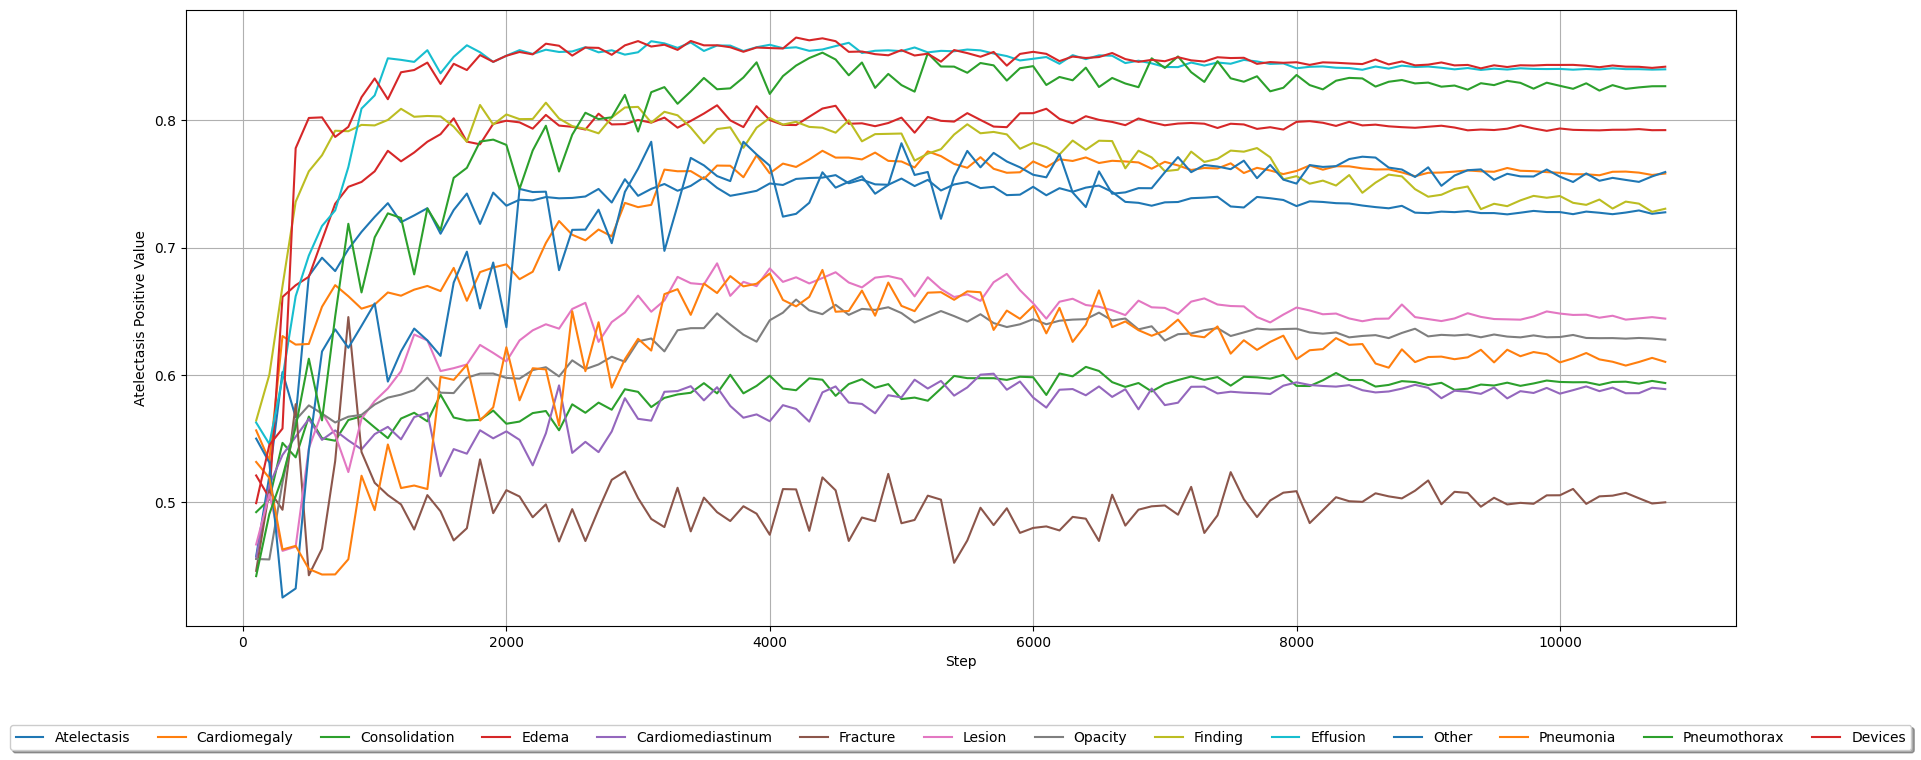

In [13]:

# 读取log文本
def extract_performance(path='/Users/liu/Desktop/school_academy/ShanghaiTech/learning/code/diagnosisP/github/Fine-Grained_Features_Alignment_via_Constrastive_Learning/logs/densenet_clip_21.log', print_flag = False):
  import re
  import pandas as pd

  # Read the log file
  with open(path, 'r') as file:
      log_text = file.read()

  # Extract evaluation results using regular expressions
  eval_matches = re.finditer(r'######### Eval (\d+) #########(.*?)\n\n', log_text, re.DOTALL)

  eval_results = []

  for match in eval_matches:
      step, diseases_info = match.groups()
      step = int(step)

      # Extract accuracy
      accuracy_match = re.search(r'acc: (\d+\.\d+)', diseases_info)
      accuracy = float(accuracy_match.group(1))

      # Extract diseases results
      diseases_matches = re.findall(r'(\b\w+\b)\s*{\'positive\': ([\d.]+), \'negative\': ([\d.]+), \'uncertain\': ([\d.]+)}', diseases_info)
      diseases_results = {disease: {'positive': float(pos), 'negative': float(neg), 'uncertain': float(unc)} for disease, pos, neg, unc in diseases_matches}

      eval_results.append({'step': step, 'accuracy': accuracy, 'diseases_results': diseases_results})
  return eval_results
    

  # Convert to DataFrame
  df_list = []

  for result in eval_results:
      step = result['step']
      accuracy = result['accuracy']
      diseases_results = result['diseases_results']

      for disease, values in diseases_results.items():
          row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
          row_data.update({f'{disease}_{key}': value for key, value in values.items()})
          df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

#

eval_results = extract_performance()
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()
df = df_all
def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- dense_clip')
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))
  plt.title("")

  plt.show()
    
plot_14_class(df_all)


#### plot densenet_clip_v_21.log

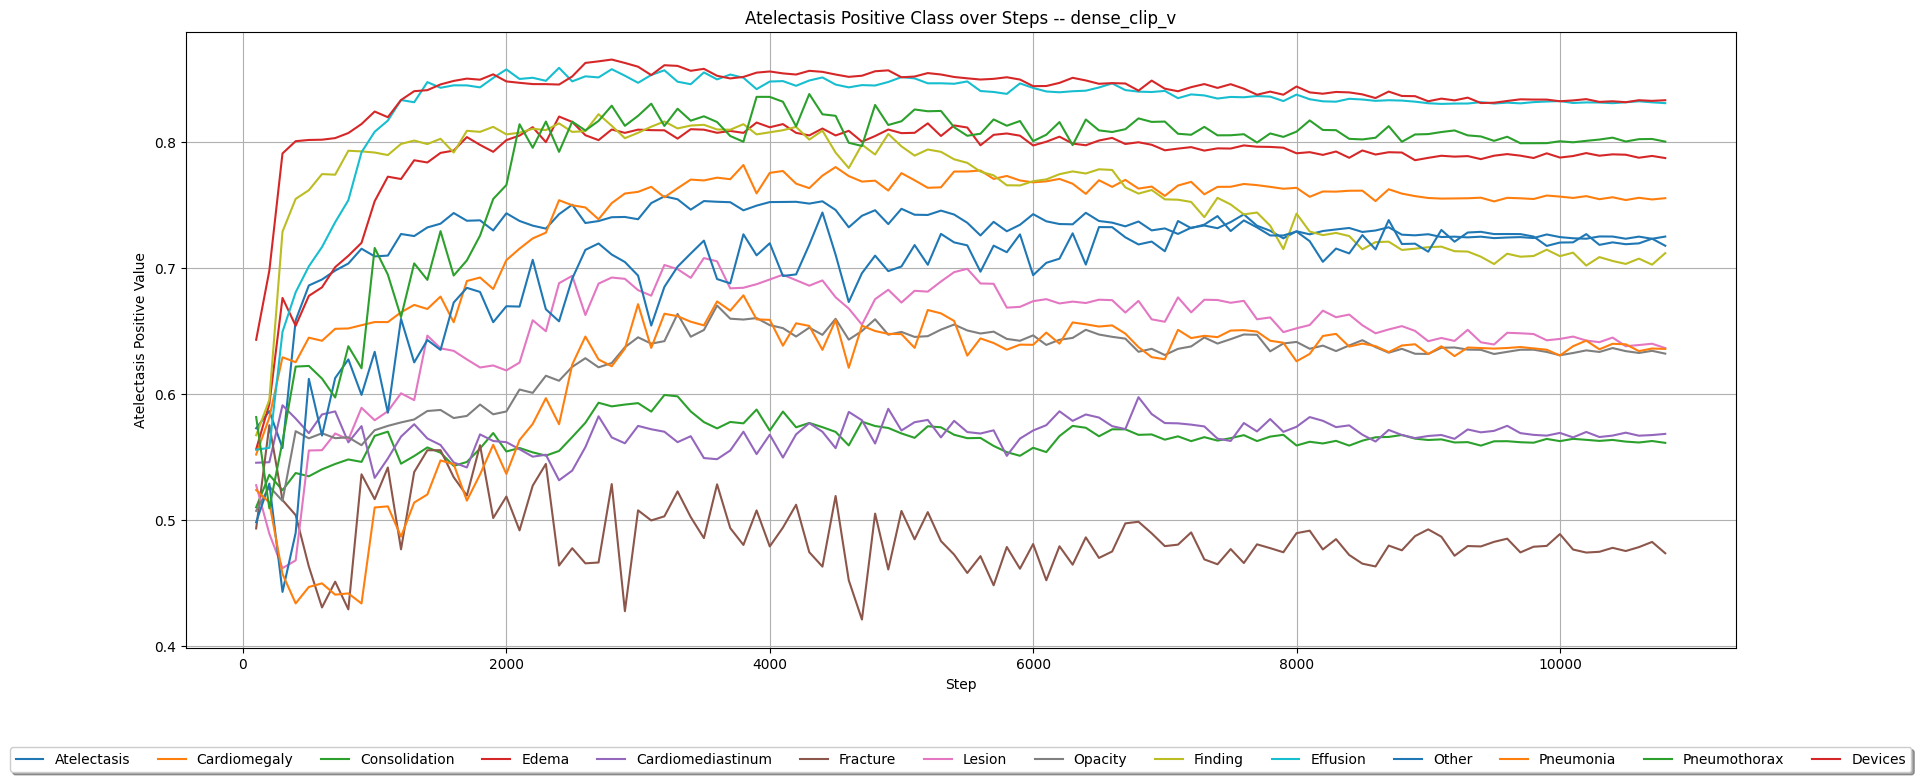

In [14]:
eval_results = extract_performance('/Users/liu/Desktop/school_academy/ShanghaiTech/learning/code/diagnosisP/github/Fine-Grained_Features_Alignment_via_Constrastive_Learning/logs/densenet_clip_v_21.log')
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- dense_clip_v')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
  sns.set()
  
    
plot_14_class(df_all)



#### plot clip_21.log

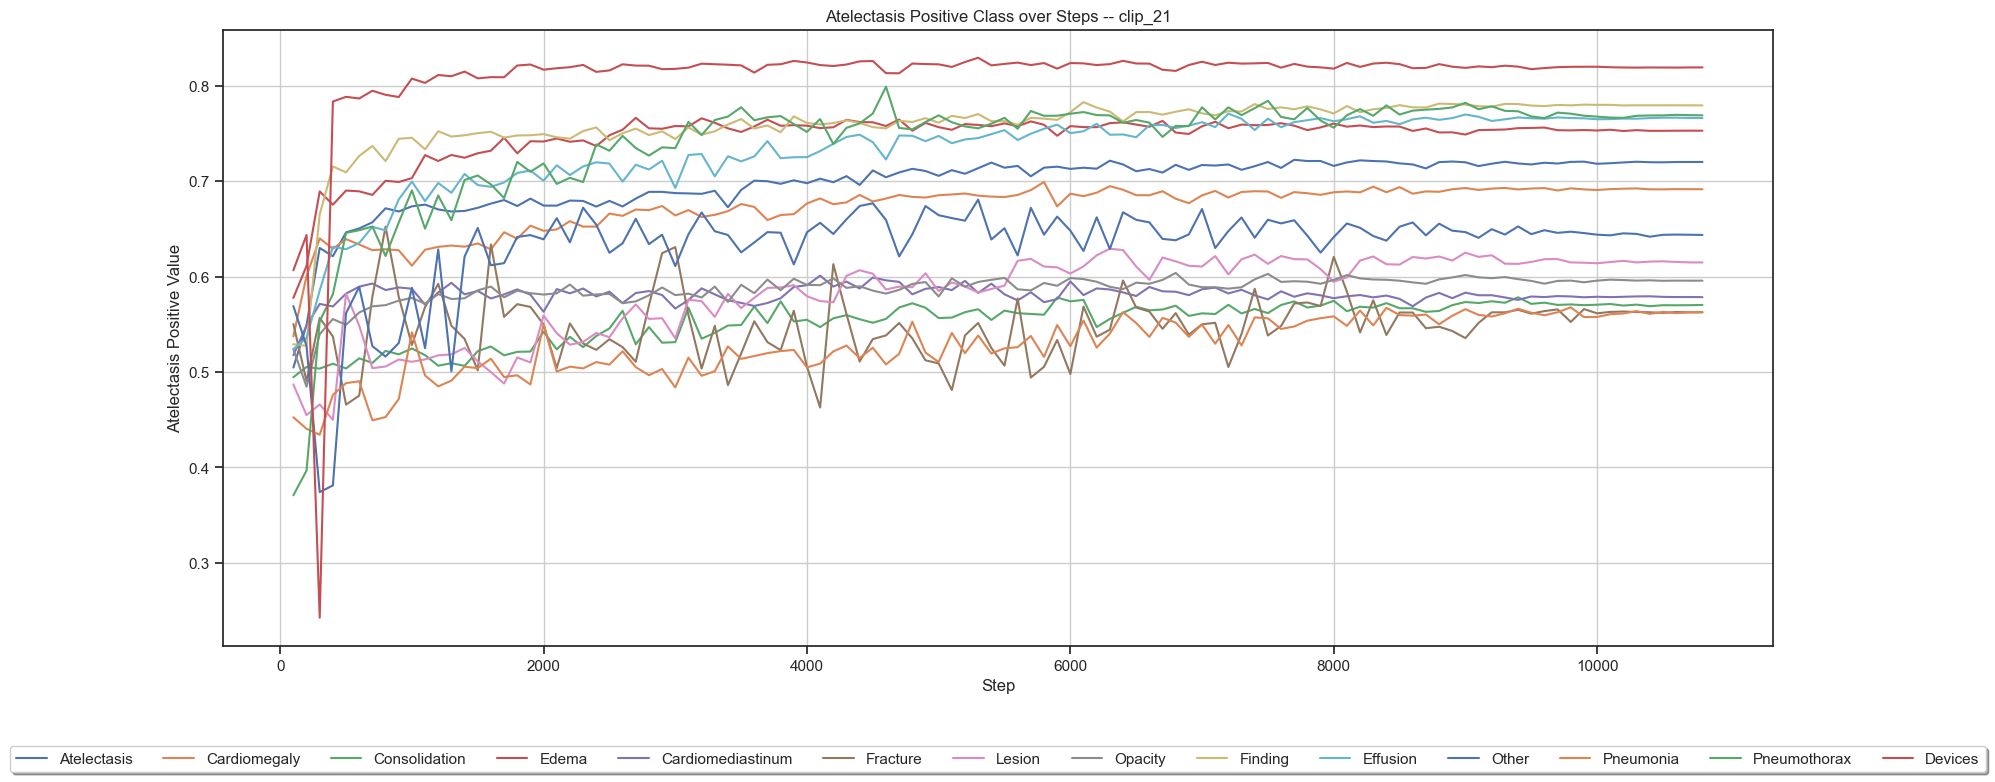

In [19]:
eval_results = extract_performance('/Users/liu/Desktop/school_academy/ShanghaiTech/learning/code/diagnosisP/github/Fine-Grained_Features_Alignment_via_Constrastive_Learning/logs/clip_21.log')
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- clip_21')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  sns.set(style="ticks")
  plt.grid(True)

  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)



#### plot clip_v_21.log

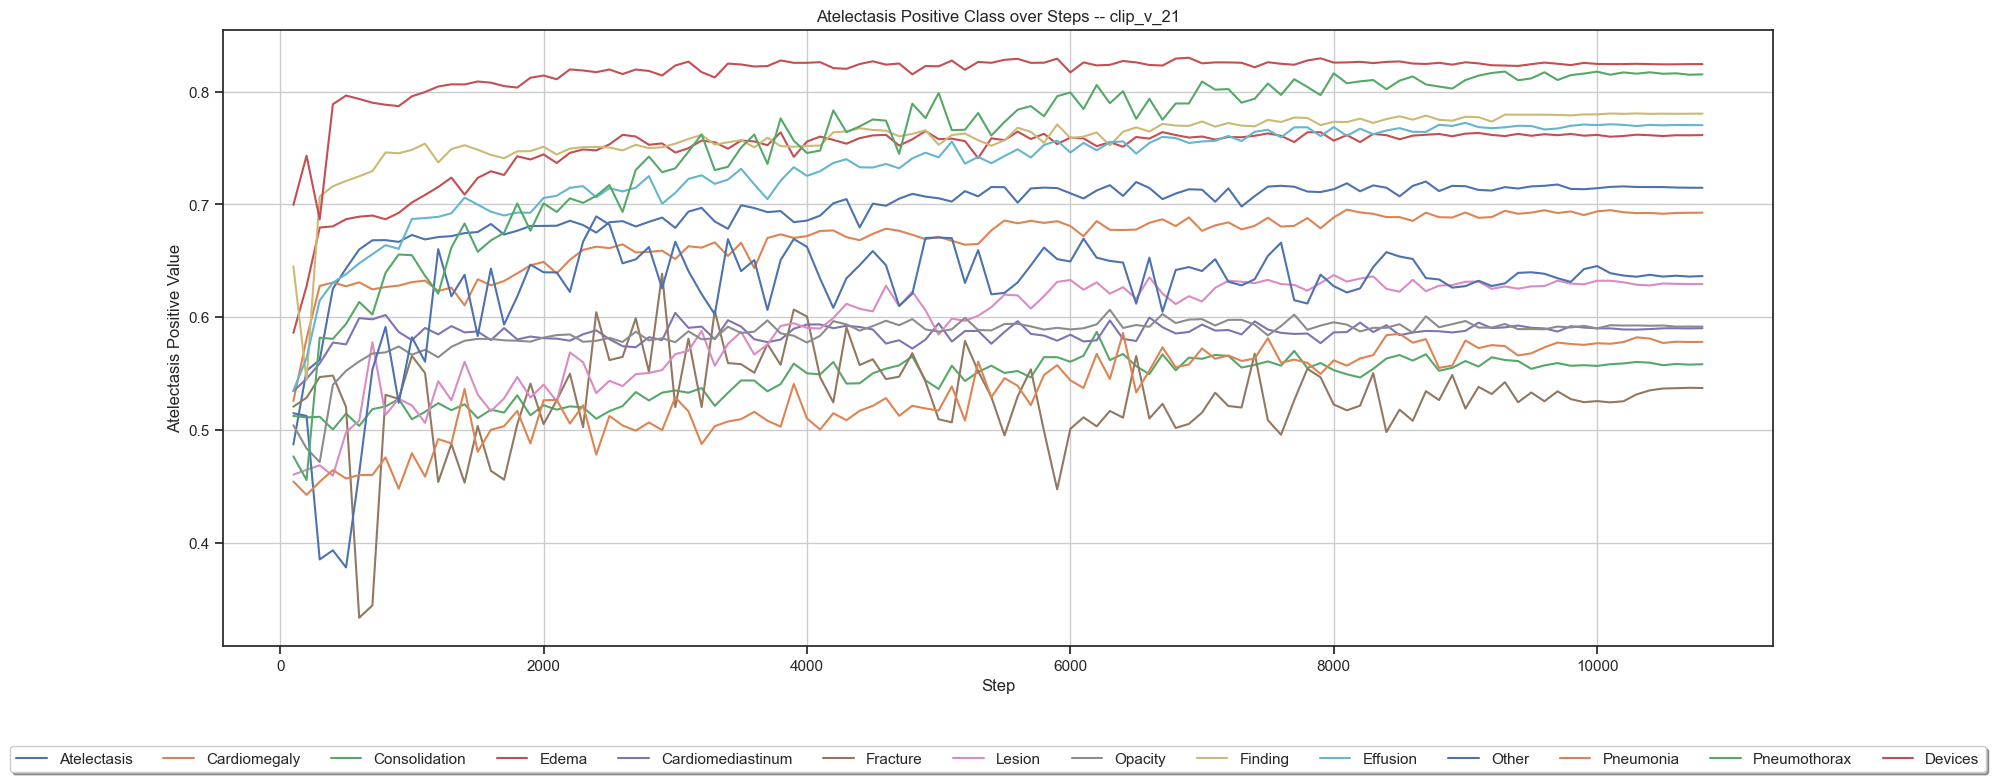

In [20]:
val_results = extract_performance('/Users/liu/Desktop/school_academy/ShanghaiTech/learning/code/diagnosisP/github/Fine-Grained_Features_Alignment_via_Constrastive_Learning/logs/clip_v_21.log')
eval_results

import pandas as pd 
# Convert to DataFrame

def get_df(eval_results=eval_results):
  df_list = []

  for record in eval_results:
  
      step = record['step']
      accuracy = record['accuracy']
      diseases_results = record['diseases_results']

      for disease, values in diseases_results.items():
          for class_name, val in values.items():
            row_data = {'Step': step, 'Accuracy': accuracy, 'Disease': disease}
            row_data["class_n"] = class_name
            row_data['v'] = val
          # row_data.update({f'{disease}_{key}': value for key, value in values.items()})
            df_list.append(row_data)

  df = pd.DataFrame(df_list)
  return df

# Display the DataFrame
df_all = get_df()

def filter_df(disease='Atelectasis', class_n='positive', df=df):
  df = df[df.Disease == disease]
  return df[df.class_n == class_n]



def plot_14_class(df_all,):
  diseases = df_all.Disease.unique()
  plt.figure(figsize=(20, 8))
  
  
  for disease in diseases:
    filter_df_ = filter_df(disease = disease, df = df_all)
    sns.lineplot(data = filter_df_, x=filter_df_['Step'], y=filter_df_['v'], label = disease)
    # Set plot title and labels
    plt.title('Atelectasis Positive Class over Steps -- clip_v_21')
    
    plt.xlabel('Step')
    plt.ylabel('Atelectasis Positive Value')
  plt.grid()
  plt.legend()
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=len(diseases))


  plt.show()
    
plot_14_class(df_all)



In [27]:
## 交互式可视化
import plotly.express as px
import pandas as pd

def filter_df(disease='Atelectasis', class_n='positive', df=df_all):
    df_filtered = df[(df['Disease'] == disease) & (df['class_n'] == class_n)]
    return df_filtered

def plot_14_class(df_all):
    diseases = df_all['Disease'].unique()

    for disease in diseases:
        # Filter DataFrame for the specific disease
        filter_df_ = filter_df(disease=disease, df=df_all)

        # Use Plotly Express to create an interactive line plot
        fig = px.line(filter_df_, x='Step', y='v', 
                      labels={'v': 'Positive Value', 'Step': 'Step'},
                      title=f'{disease} Positive Class over Steps -- clip_v_21')

        # Refine y-axis ticks
        fig.update_yaxes(tickvals=[i/10 for i in range(11)])  # Adjust as needed

        # Add a red line at y=0.5
        fig.add_shape(
            go.layout.Shape(
                type='line',
                x0=0,
                y0=0.5,
                x1=filter_df_['Step'].max(),
                y1=0.5,
                line=dict(color='red', width=2)
            )
        )

        # Show each plot interactively
        fig.show()

# Assuming df_all is your DataFrame
plot_14_class(df_all)


#### <font color=red>phased conclusion:</font>
从当前的可视化结果来说，
1. 加了text在已于分割的label上，相较于single visual branch来说没有优势（甚至还有有所下降）
2. 加了text对于分类结果较差的label，有一定的提升能力（fracture）